In [18]:
# import dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
# import the time module
import time
# import the API key
from config import weather_api_key

In [2]:
# create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# create a list to hold the cities
cities = []

# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if the city is unique, add it to cities[]
    if city not in cities:
        cities.append(city)

#print the length of the cities list to confirm sufficient count
len(cities)


588

In [5]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# create an empty list to hold the weather data
city_data = []
# print the beginning of the logging.
print("Beginning Data Retrieval")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # create endpoint url with each city
    city_url = url + "&q=" + city#.replace(" ", "+")
    
    # log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #increase record count
    record_count += 1

# run an API request for each of the cities.
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # if an error occurs, skip city
    except:
        print("City not found. Skipping. . .")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | bogalusa
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | faya
Processing Record 6 of Set 1 | husum
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | kaseda
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | havre-saint-pierre
Processing Record 12 of Set 1 | sistranda
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | hope
Processing Record 16 of Set 1 | khani
Processing Record 17 of Set 1 | huarmey
Processing Record 18 of Set 1 | hihifo
City not found. Skipping. . .
Processing Record 19 of Set 1 | moose factory
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | saleaula
City not found. Skipping. . .
Processing Record 22 of Set 1 | i

Processing Record 38 of Set 4 | beringovskiy
Processing Record 39 of Set 4 | deh rawud
City not found. Skipping. . .
Processing Record 40 of Set 4 | san quintin
Processing Record 41 of Set 4 | san vicente
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | outjo
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | acari
Processing Record 47 of Set 4 | rongcheng
Processing Record 48 of Set 4 | tanshui
City not found. Skipping. . .
Processing Record 49 of Set 4 | baiyin
Processing Record 50 of Set 4 | atambua
Processing Record 1 of Set 5 | salihorsk
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | sao paulo de olivenca
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | columbus
Processing Record 6 of Set 5 | gonbad-e qabus
Processing Record 7 of Set 5 | hirara
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | nizhniy ingash
Processing Recor

Processing Record 30 of Set 8 | kautokeino
Processing Record 31 of Set 8 | vanavara
Processing Record 32 of Set 8 | santiago
Processing Record 33 of Set 8 | samarai
Processing Record 34 of Set 8 | khorramabad
Processing Record 35 of Set 8 | lively
Processing Record 36 of Set 8 | arman
Processing Record 37 of Set 8 | batman
Processing Record 38 of Set 8 | hendijan
City not found. Skipping. . .
Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | flagstaff
Processing Record 41 of Set 8 | canutama
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | kapit
Processing Record 45 of Set 8 | varca
Processing Record 46 of Set 8 | vestmannaeyjar
Processing Record 47 of Set 8 | mahajanga
Processing Record 48 of Set 8 | acapulco
Processing Record 49 of Set 8 | luderitz
Processing Record 50 of Set 8 | oranjemund
Processing Record 1 of Set 9 | batemans bay
Processing Record 2 of Set 9 | rocha
Processing Record 3 of Set

Processing Record 13 of Set 12 | gornyy
Processing Record 14 of Set 12 | awassa
Processing Record 15 of Set 12 | marcona
City not found. Skipping. . .
Processing Record 16 of Set 12 | narrabri
Processing Record 17 of Set 12 | oistins
Processing Record 18 of Set 12 | cloquet
Processing Record 19 of Set 12 | pinheiro machado
Processing Record 20 of Set 12 | chifeng
Processing Record 21 of Set 12 | illescas
Processing Record 22 of Set 12 | shenzhen
Processing Record 23 of Set 12 | coolum beach
Processing Record 24 of Set 12 | palana
Processing Record 25 of Set 12 | yaring
Processing Record 26 of Set 12 | little current
Processing Record 27 of Set 12 | hobyo
Processing Record 28 of Set 12 | mozarlandia
Processing Record 29 of Set 12 | westport
Processing Record 30 of Set 12 | ataco
Processing Record 31 of Set 12 | peniche
Processing Record 32 of Set 12 | omboue
Processing Record 33 of Set 12 | senmonorom
City not found. Skipping. . .
Processing Record 34 of Set 12 | dubuque
Processing Reco

In [6]:
print(len(cities))

588


In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,77.18,85,100,3.00,US,2021-10-17 18:54:46
1,Port Blair,11.6667,92.7500,79.95,87,99,6.29,IN,2021-10-17 18:57:06
2,Bogalusa,30.7910,-89.8487,75.74,33,1,6.91,US,2021-10-17 18:57:06
3,Hermanus,-34.4187,19.2345,55.90,66,45,5.68,ZA,2021-10-17 18:57:07
4,Faya,18.3851,42.4509,69.91,24,2,6.98,SA,2021-10-17 18:49:01
5,Husum,54.4858,9.0524,51.89,96,100,10.58,DE,2021-10-17 18:57:08
6,Nikolskoye,59.7035,30.7861,44.87,74,84,10.20,RU,2021-10-17 18:56:17
7,Vaini,-21.2000,-175.2000,73.56,94,75,8.05,TO,2021-10-17 18:57:09
8,Kaseda,31.4167,130.3167,62.67,63,100,7.07,JP,2021-10-17 18:53:54
9,Cape Town,-33.9258,18.4232,59.09,67,20,1.99,ZA,2021-10-17 18:51:17


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.tail(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
522,Cloquet,US,2021-10-17 19:01:18,46.7216,-92.4594,66.00,33,1,10.36
523,Pinheiro Machado,BR,2021-10-17 19:01:18,-31.5783,-53.3811,64.06,59,0,7.43
524,Chifeng,CN,2021-10-17 19:01:19,42.2683,118.9636,39.56,37,100,8.14
525,Illescas,ES,2021-10-17 19:01:20,40.1221,-3.8470,68.20,61,45,7.90
526,Shenzhen,CN,2021-10-17 18:56:46,22.5455,114.0683,72.21,88,86,8.55
527,Coolum Beach,AU,2021-10-17 19:01:21,-26.5333,153.1000,62.11,94,100,0.78
528,Palana,RU,2021-10-17 18:54:50,59.1167,159.9667,30.61,68,100,23.31
529,Yaring,TH,2021-10-17 19:01:22,6.8662,101.3689,77.67,85,100,5.17
530,Little Current,CA,2021-10-17 19:01:22,45.9793,-81.9248,56.41,59,35,15.41
531,Hobyo,SO,2021-10-17 19:01:23,5.3505,48.5268,78.49,84,100,22.21


In [16]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# export the city_data into a .csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# begin cells about relationship between latitude and temperature

In [17]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

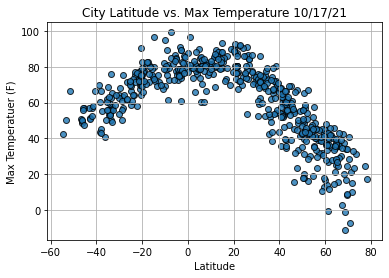

In [21]:
# build scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperatuer (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

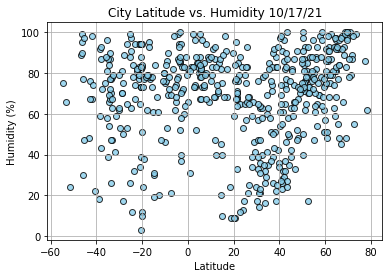

In [22]:
# build scatter plot for latitude vs humidity
plt.scatter(lats, humidity, c='skyblue', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

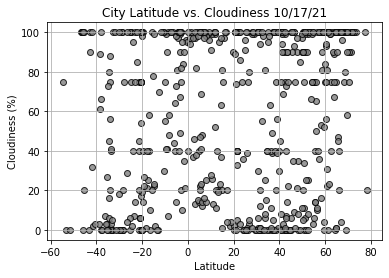

In [23]:
# build scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, c='gray', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

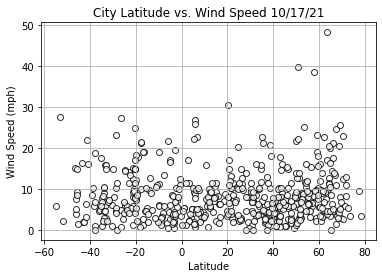

In [24]:
# build scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, c='white', edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# incorportate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()